In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# 1. Load Data
df = pd.read_csv('/content/drive/MyDrive/loan_data.csv')
X = df.drop(columns=['id', 'grade_subgrade', 'loan_paid_back'])
y = df['loan_paid_back']

# 2. Stratified Split
# We use stratify=y to ensure the 80/20 default rate is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Preprocessing Pipeline
numeric_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
categorical_features = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Model Definition
# class_weight='balanced' is critical here to penalize missing the minority class (Defaults)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ))
])

# 5. Training
print("Training Model...")
rf_pipeline.fit(X_train, y_train)

# 6. Prediction & Evaluation
# Predict probabilities (Class 1: Paid Back)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

final_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Final Test AUC: {final_auc:.4f}")


Training Model...
Final Test AUC: 0.9140


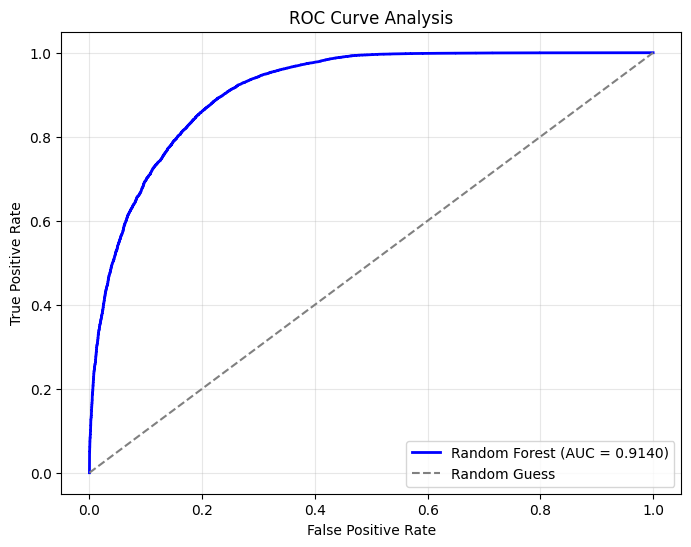

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



# 2. Calculate ROC Curve Points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# 4. Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
